
LSTM과 GRU 차이점
LSTM(Long Short-Term Memory)과 GRU(Gated Recurrent Unit)는 모두 순환 신경망(RNN)의 장기 의존성 문제를 해결하기 위해 고안된 모델입니다. GRU는 LSTM의 구조를 더 단순화하여 계산 효율을 높인 모델로, 두 모델의 주요 차이점은 내부 구조와 연산 방식에 있습니다.

비유: 기억 창고 관리

LSTM: 엄격한 보안 시스템 (3개의 문)

입구 문 (Input Gate): 새 정보를 받을지 말지 결정

쓰레기통 문 (Forget Gate): 오래된 기억을 버릴지 결정

출구 문 (Output Gate): 무엇을 내보낼지 결정

창고 2개: 장기 기억(Cell State) + 단기 기억(Hidden State) 따로 관리

결과: 아주 정교하지만 관리가 복잡하고 느림​



GRU: 단순화된 보안 (2개의 문)

업데이트 문 (Update Gate): "새 정보를 얼마나 반영할까? 옛날 기억은 얼마나 잊을까?" 둘을 한 번에 결정

리셋 문 (Reset Gate): "과거 정보 중 뭘 리셋(초기화)할까?"

창고 1개: Hidden State 하나로 통합 관리

결과: 빠르고 가벼우면서도 성능은 비슷함


In [ ]:
#LSTM 신경망 훈련하기~

from keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target)=imdb.load_data(num_words=500)

train_input, val_input, train_target, val_target=train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

#파이썬에서 괄호 ()를 사용하여 변수를 묶는 것은 **튜플 언패킹(Tuple Unpacking)**이라는 문법을 사용하여 데이터를 깔끔하게 정리해서 받기 위함입니다.

파이썬에서 괄호 ()를 사용하여 변수를 묶는 것은 **튜플 언패킹(Tuple Unpacking)**이라는 문법을 사용하여 데이터를 깔끔하게 정리해서 받기 위함입니다.

imdb.load_data() 함수가 데이터를 돌려주는(return) 방식과, 우리가 그것을 받는 방식을 비교해서 쉽게 설명해 드릴게요.

📦 상황 설명
1. 함수가 주는 것 (배달원)
imdb.load_data() 함수는 결과를 큰 튜플 하나로 묶어서 줍니다. 그 안에는 두 개의 작은 튜플이 들어있습니다.

형태: ((훈련데이터, 훈련정답), (테스트데이터, 테스트정답))

2. 우리가 받는 방식 (집주인)
만약 괄호 없이 변수 하나로만 받는다면?

python
data = imdb.load_data(num_words=500)
# data[0] 은 (train_input, train_target)
# data[1] 은 (test_input, test_target)
# 사용하려면 data[0][0] 처럼 복잡하게 꺼내 써야 합니다.
3. 괄호로 묶어서 받는 방식 (스마트한 정리)

python
(train_input, train_target), (test_input, test_target) = imdb.load_data(...)
이렇게 좌변(왼쪽)의 모양을 우변(오른쪽) 데이터 모양과 똑같이 맞춰주면(구조 분해), 파이썬이 알아서 포장을 뜯어서 변수에 착착 넣어줍니다.

첫 번째 덩어리의 1번 내용물 → train_input

첫 번째 덩어리의 2번 내용물 → train_target

두 번째 덩어리의 1번 내용물 → test_input

두 번째 덩어리의 2번 내용물 → test_target

💡 요약
괄호로 묶는 이유는 **"데이터의 구조(짝)를 맞춰서 변수에 한 번에 예쁘게 담기 위해서"**입니다. 이를 통해 나중에 train_input 같은 변수명을 바로 사용할 수 있어 코드가 훨씬 직관적이 됩니다.



In [ ]:
from keras.preprocessing.sequence import pad_sequences

train_seq=pad_sequences(train_input, maxlen=100)
val_seq=pad_sequences(val_input, maxlen=100)

In [ ]:
import keras

model_lstm=keras.Sequential()
model_lstm.add(keras.layers.Input(shape=(100,)))
model_lstm.add(keras.layers.Embedding(500,16))
model_lstm.add(keras.layers.LSTM(8))
model_lstm.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model_lstm.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 8)              │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import EarlyStopping
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-lstm-model.keras', save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history=model_lstm.fit(train_seq, train_target, epochs=100, batch_size=64,
                       validation_data=(val_seq, val_target),
                       callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.6281 - loss: 0.6404 - val_accuracy: 0.7620 - val_loss: 0.4901
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.7851 - loss: 0.4617 - val_accuracy: 0.7872 - val_loss: 0.4418
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8043 - loss: 0.4260 - val_accuracy: 0.8014 - val_loss: 0.4308
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8077 - loss: 0.4168 - val_accuracy: 0.7966 - val_loss: 0.4284
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8087 - loss: 0.4101 - val_accuracy: 0.8078 - val_loss: 0.4239
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.8145 - loss: 0.4025 - val_accuracy: 0.7996 - val_loss: 0.4331
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.8175 - loss: 0.4011 - val_accuracy: 0.8016 - val_loss: 0.4268
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8159 - loss: 0

1. ModelCheckpoint - 똑똑한 저장 조교 💾
역할: "훈련하는 동안 성능이 가장 좋을 때만 골라서 모델을 저장해 줘!"

왜 필요해?: 100번 훈련한다고 해서 100번째 모델이 항상 최고는 아닙니다. 중간에 50번째 모델이 더 성능이 좋았을 수도 있죠. ModelCheckpoint는 성능이 좋아질 때마다 낡은 모델은 버리고 새 모델로 계속 덮어씌워서, 최종적으로 가장 성능이 좋았던 "베스트 모델" 하나만 남겨줍니다.​

코드 해설:

python
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'best-lstm-model.keras',   # "이 이름으로 저장해줘"
    save_best_only=True        # "최고 성능일 때만 저장해줘!"
)


2. EarlyStopping - 성실한 시간 관리 조교 ⏰
역할: "훈련하는데 성능이 더 이상 오르지 않으면, 시간 낭비하지 말고 그만 멈춰!"

왜 필요해?: 훈련을 계속해도 성능이 나아지지 않는 시점이 옵니다. 불필요한 훈련을 계속하면 시간과 전기만 낭비되죠. EarlyStopping은 성능 개선이 없으면 훈련을 조기에 중단시켜 줍니다.​

코드 해설:

python
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=3,                 # "3번 연속으로 성능이 안 오르면"
    restore_best_weights=True   # "멈추기 전에, 가장 좋았던 성능으로 되돌려줘"
)
🎯 둘을 함께 쓰면? (환상의 콤비)
"훈련을 진행하면서 성능이 가장 좋을 때마다 모델을 저장(Checkpoint) 하다가, 3번 연속으로 성능이 안 오르면 훈련을 멈추고(EarlyStopping), 그동안 저장했던 최고 성능의 모델로 최종 결과를 확정해 줘!"

이렇게 두 조교를 함께 사용하면 불필요한 훈련 시간을 줄이면서도 최고 성능의 모델을 안정적으로 얻을 수 있습니다.

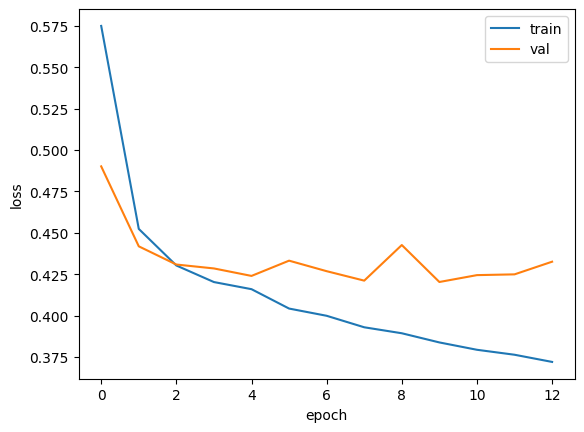

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#순환층도 드롭아웃할 쑤 이써!

model_dropout=keras.Sequential()
model_dropout.add(keras.layers.Input(shape=(100,)))
model_dropout.add(keras.layers.Embedding(500,16))
model_dropout.add(keras.layers.LSTM(8,dropout=0.2))
model_dropout.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model_dropout.compile(optimizer='adam', loss='binary_crossentropy',
                      metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-dropout-model.keras', save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,
                                                restore_best_weights=True)
history=model_dropout.fit(train_seq, train_target, epochs=100, batch_size=64,
                          validation_data=(val_seq, val_target),
                          callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.5777 - loss: 0.6686 - val_accuracy: 0.7544 - val_loss: 0.5194
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.7713 - loss: 0.4918 - val_accuracy: 0.7836 - val_loss: 0.4560
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.7930 - loss: 0.4508 - val_accuracy: 0.7972 - val_loss: 0.4344
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.8000 - loss: 0.4336 - val_accuracy: 0.8030 - val_loss: 0.4297
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.8102 - loss: 0.4185 - val_accuracy: 0.8006 - val_loss: 0.4307
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.8114 - loss: 0.4096 - val_accuracy: 0.7914 - val_loss: 0.4455
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.8158 - loss: 0.4103 - val_accuracy: 0.8014 - val_loss: 0.4281
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.8175 - loss: 0

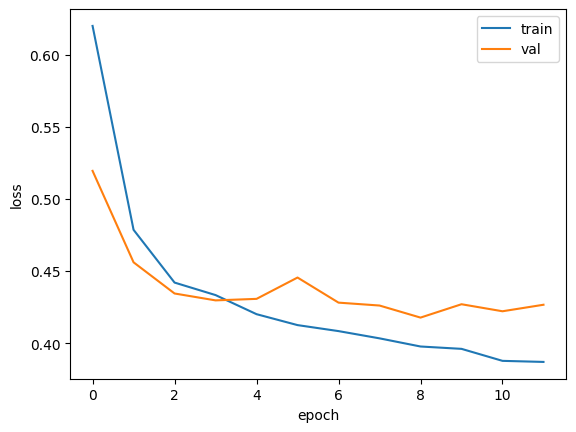

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model_2lstm=keras.Sequential()
model_2lstm.add(keras.layers.Input(shape=(100,)))
model_2lstm.add(keras.layers.Embedding(500,16))
model_2lstm.add(keras.layers.LSTM(8,dropout=0.2, return_sequences=True))
model_2lstm.add(keras.layers.LSTM(8,dropout=0.2))
model_2lstm.add(keras.layers.Dense(1, activation='sigmoid'))
model_2lstm.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 8)         │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 8)              │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_2lstm.compile(optimizer='adam', loss='binary_crossentropy',
                    metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-2lstm-model.keras',
                                              save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history=model_2lstm.fit(train_seq, train_target, epochs=100, batch_size=64,
                        validation_data=(val_seq, val_target),
                        callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 82ms/step - accuracy: 0.5935 - loss: 0.6534 - val_accuracy: 0.7800 - val_loss: 0.4747
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.7755 - loss: 0.4777 - val_accuracy: 0.7926 - val_loss: 0.4402
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.7910 - loss: 0.4514 - val_accuracy: 0.7992 - val_loss: 0.4441
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.8041 - loss: 0.4268 - val_accuracy: 0.7992 - val_loss: 0.4263
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 80ms/step - accuracy: 0.8083 - loss: 0.4179 - val_accuracy: 0.8012 - val_loss: 0.4310
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - accuracy: 0.8114 - loss: 0.4120 - val_accuracy: 0.8050 - val_loss: 0.4281
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 85ms/step - accuracy: 0.8155 - loss: 0.4081 - val_accuracy: 0.8052 - val_loss: 0.4203
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - accuracy: 0.8163 - loss: 0

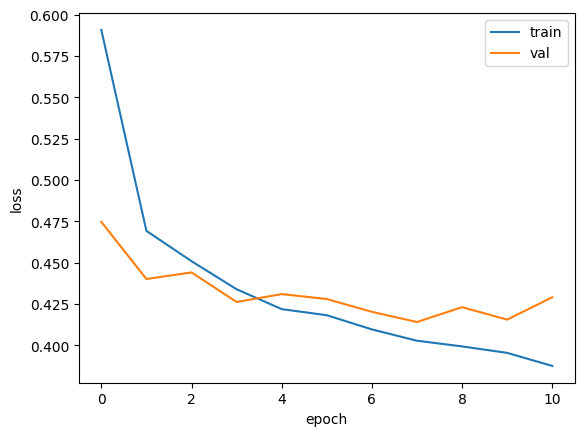

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#GRU 신경망 훈련하기
model_gru=keras.Sequential()
model_gru.add(keras.layers.Input(shape=(100,)))
model_gru.add(keras.layers.Embedding(500,16))
model_gru.add(keras.layers.GRU(8,dropout=0.2))
model_gru.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model_gru.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 8)              │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,633 (33.72 KB)

 Trainable params: 8,633 (33.72 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_gru.compile(optimizer='adam', loss='binary_crossentropy',
                      metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-gru-model.keras', save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,
                                                restore_best_weights=True)
history=model_gru.fit(train_seq, train_target, epochs=100, batch_size=64,
                          validation_data=(val_seq, val_target),
                          callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.5681 - loss: 0.6719 - val_accuracy: 0.7268 - val_loss: 0.5529
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.7746 - loss: 0.4853 - val_accuracy: 0.7726 - val_loss: 0.4769
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - accuracy: 0.7878 - loss: 0.4612 - val_accuracy: 0.7812 - val_loss: 0.4655
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.7936 - loss: 0.4448 - val_accuracy: 0.7958 - val_loss: 0.4383
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8100 - loss: 0.4194 - val_accuracy: 0.7952 - val_loss: 0.4361
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.8165 - loss: 0.4094 - val_accuracy: 0.7988 - val_loss: 0.4296
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.8159 - loss: 0.4084 - val_accuracy: 0.8086 - val_loss: 0.4212
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.8254 - loss: 0

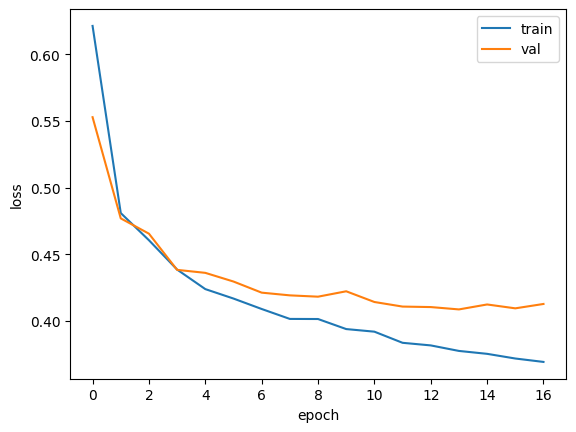

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#LSTM과 GRU 셀로 훈련
test_seq=pad_sequences(test_input, maxlen=100)
best_model=keras.models.load_model('best-gru-model.keras')
best_model.evaluate(test_seq, test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8174 - loss: 0.4059


[0.40330636501312256, 0.817520022392273]